# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [87]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
browser = Browser('chrome')
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

The chromedriver version (128.0.6613.84) detected in PATH at C:\Users\rossb\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe might not be compatible with the detected chrome version (129.0.6668.59); currently, chromedriver 129.0.6668.70 is recommended for chrome 129.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [16]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
#url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
#browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [89]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [90]:
# Extract all rows of data
all_rows = soup.find_all()
print(all_rows)

[<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [91]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
all_rows = soup.find_all('tr') 
print(len(all_rows))

for row in all_rows:
    row_data = [cell.get_text() for cell in row.find_all(['th', 'td'])]
    mars_weather.append(row_data)
    
mars_weather

1868


[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [92]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# data[1:], columns=data[0]
mars_weather_df = pd.DataFrame(mars_weather[1:], columns=mars_weather[0])


In [93]:
# Confirm DataFrame was created successfully
print(mars_weather_df.head())
print(mars_weather_df.sample(20))

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0
        id terrestrial_date   sol   ls month min_temp pressure
228    169       2013-05-15   275  318    11    -67.0    860.0
1844  1873       2018-02-04  1955  124     5    -77.0    745.0
814    838       2015-02-18   902  293    10    -68.0    883.0
1520  1548       2017-03-06  1629  328    11    -74.0    837.0
1324  1351       2016-08-14  1430  203     7    -69.0    810.0
730    751       2014-11-16   810  234     8    -69.0    897.0
1162  1188       2016-02-18  1257  110     4    -84.0    794.0
1177  1203       2016-03-05  1272  117     4    -81.0    780.0
1271  1297       2016-06-11  1368  167     6    -74.0    743.0
1468  1495       2017-01-09  1574 

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [94]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [95]:
# Change data types for data analysis
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)



In [96]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [97]:
# 1. How many months are there on Mars?
number_of_months = mars_weather_df['month'].nunique()
print(f"There are approximately {number_of_months} months on Mars.")

There are approximately 12 months on Mars.


In [98]:
# 2. How many sols (Martian days) worth of data are there?
sol_data = mars_weather_df['sol'].nunique()
print(f"There are about {sol_data} Martian days worth of data.")

There are about 1867 Martian days worth of data.


In [105]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(f"The average minimum temperature by month on Mars is: {avg_min_temp_by_month}")

The average minimum temperature by month on Mars is: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


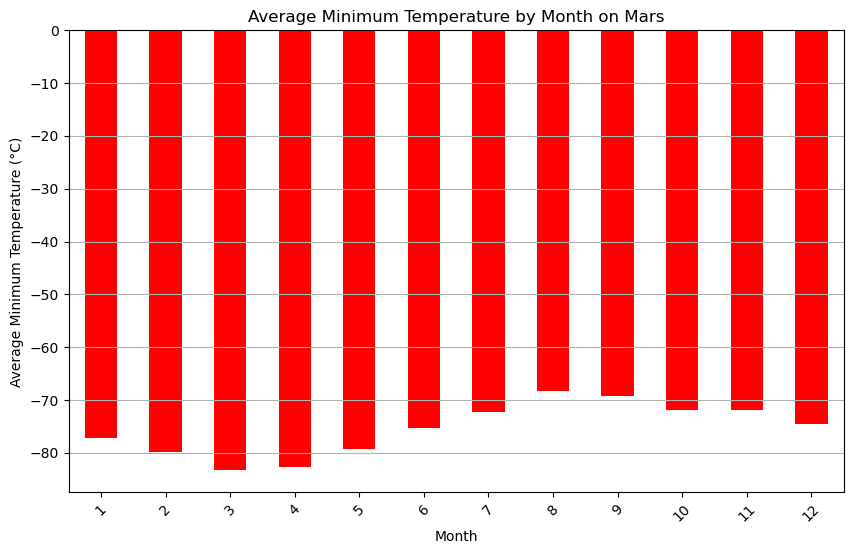

In [107]:
# Plot the average minimum temperature by month
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='red')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

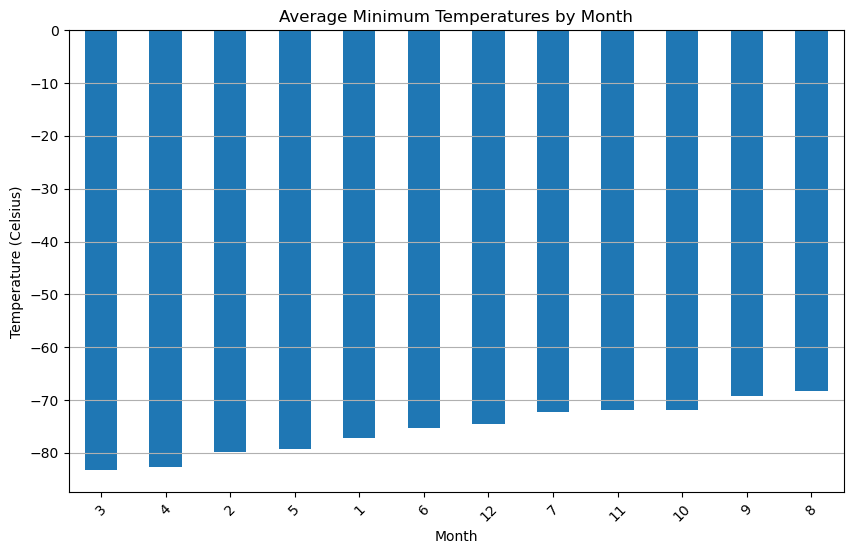

In [108]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temps = mars_weather_df.groupby('month')['min_temp'].mean()
sorted_avg_min_temps = avg_min_temps.sort_values()
coldest_month = sorted_avg_min_temps.index[0]
hottest_month = sorted_avg_min_temps.index[-1]

plt.figure(figsize=(10, 6))
sorted_avg_min_temps.plot(kind='bar', title='Average Minimum Temperatures by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [111]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print(f"The average pressure by month on Mars is: {avg_pressure_by_month}")

The average pressure by month on Mars is: month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


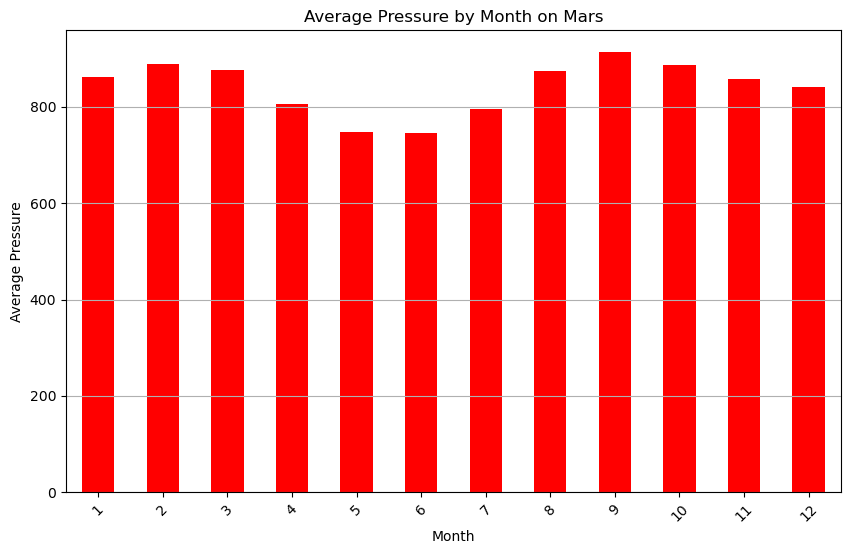

In [112]:
# Plot the average pressure by month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='red')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

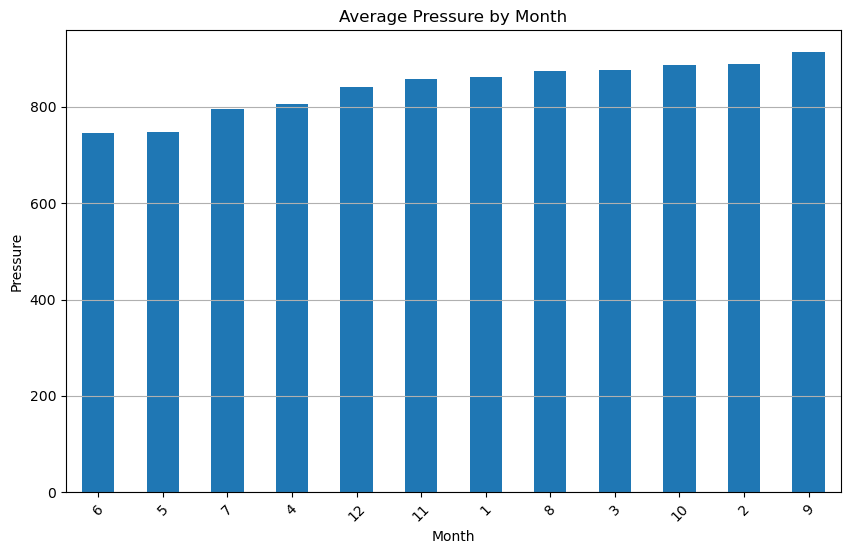

In [113]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
sorted_avg_pressure = avg_pressure.sort_values()
lowest_pressure_month = sorted_avg_min_temps.index[0]
highest_pressure_month = sorted_avg_min_temps.index[-1]

plt.figure(figsize=(10, 6))
sorted_avg_pressure.plot(kind='bar', title='Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [114]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-', markersize=3)
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid()
plt.show()

#### Minimum Temperature

Based on the minimum temperature by month, it would seem that the coldest months on Mars are March and April. The warmest months would be August and September. This would indicate that if Mars has seasons in the same way Earth does, the middle of each season would be between 45 and 60 days behind where the middle of those seasons would be on Earth. 

#### Atmospheric Pressure

The atmospheric pressure seems to change dependant on the time of year. Months 5 and 6 have significantly less atmospheric pressure than months 2 and 9. The average pressure on Mars is well above 850.  

#### Year Length

It appears that a year on Mars is about 687 earth days. This is because Mars is further from the Sun and therefore takes much longer to travel around the Sun. This distance also causes seasons to change slower. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [120]:
# Write the data to a CSV
import csv
import os

output_directory = 'output'
os.makedirs(output_directory, exist_ok=True)

with open('output/data.csv', 'w', newline='') as file:
    writer = csv.writer(file)


In [118]:
browser.quit()